# Clustering e Algoritmi Avanzati (XGBoost)
**Professore:** Gemini AI

In questo notebook affronteremo:
1. **Clustering (K-Means):** Trovare strutture nascoste in dati non etichettati.
2. **XGBoost:** Un potente algoritmo di Gradient Boosting basato su alberi di decisione, eccellente per catturare relazioni non lineari.

--- 
## 1. Clustering con K-Means
### Teoria
Il Clustering è una tecnica di **Apprendimento Non Supervisionato**. A differenza della classificazione, qui non abbiamo etichette (target). L'obiettivo è raggruppare i dati in 'cluster' basandosi sulla loro somiglianza (distanza euclidea).

**K-Means** funziona posizionando dei 'centroidi' e assegnando ogni punto al centroide più vicino, ricalcolando poi la posizione dei centri finché non si stabilizzano.

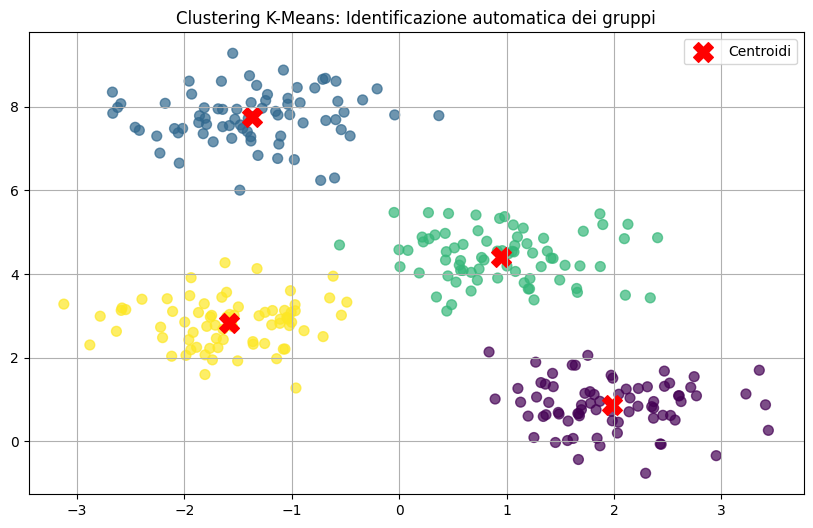

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generazione dati sintetici senza etichette (4 gruppi)
X_clust, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Applicazione di K-Means con k=4
kmeans = KMeans(n_clusters=4, n_init='auto')
y_kmeans = kmeans.fit_predict(X_clust)
centers = kmeans.cluster_centers_

# Visualizzazione
plt.figure(figsize=(10, 6))
plt.scatter(X_clust[:, 0], X_clust[:, 1], c=y_kmeans, s=50, cmap='viridis', alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroidi')
plt.title("Clustering K-Means: Identificazione automatica dei gruppi")
plt.legend()
plt.grid(True)
plt.show()

--- 
## 2. XGBoost (eXtreme Gradient Boosting)
### Teoria
XGBoost è un algoritmo di **Ensemble Learning**. Invece di usare un solo modello, combina le previsioni di molti "alberi di decisione deboli" per crearne uno forte. 

È famoso per la sua velocità e capacità di gestire dati complessi e non lineari. Qui lo useremo per risolvere un problema di classificazione con un confine di decisione a forma di 'luna'.

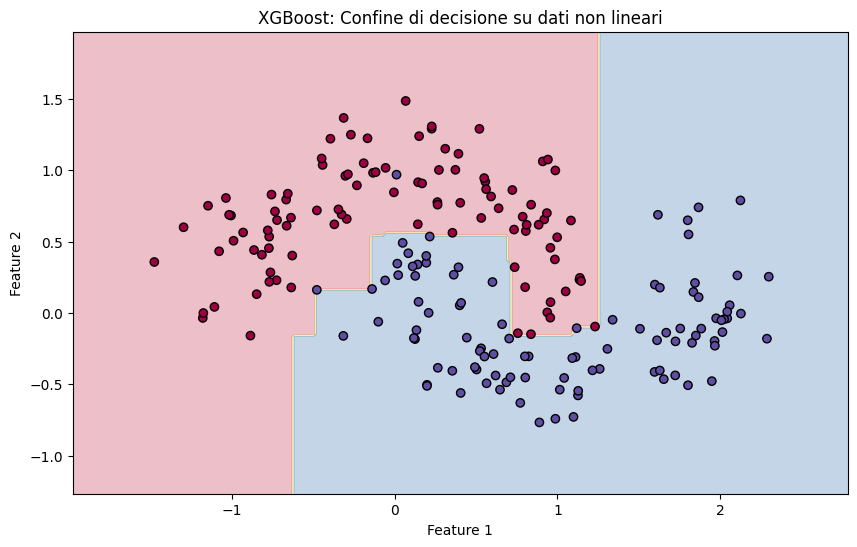

In [6]:
from xgboost import XGBClassifier
from sklearn.datasets import make_moons

# Generazione dati non lineari (forma a mezzaluna)
X_xg, y_xg = make_moons(n_samples=200, noise=0.2, random_state=42)

# Addestramento XGBoost
model_xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
model_xgb.fit(X_xg, y_xg)

# Creazione mesh per il grafico
h = .02
x_min, x_max = X_xg[:, 0].min() - 0.5, X_xg[:, 0].max() + 0.5
y_min, y_max = X_xg[:, 1].min() - 0.5, X_xg[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model_xgb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualizzazione
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Spectral')
plt.scatter(X_xg[:, 0], X_xg[:, 1], c=y_xg, edgecolors='k', cmap='Spectral')
plt.title("XGBoost: Confine di decisione su dati non lineari")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Riepilogo Tecnico
- **K-Means** ha scoperto i gruppi senza sapere a cosa appartenessero i punti (puro calcolo di distanze).
- **XGBoost** ha creato un confine di decisione molto flessibile che si adatta alle curve dei dati, superando i limiti dei modelli lineari visti in precedenza.